In [1]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. 데이터 확인

In [ ]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [ ]:
test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [ ]:
train['credit'].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

# 2. EDA


**Binary **

-gender, car, reality, FLAG_MOBIL, work_phone, phone, email

**Multi**

-순서형 : child_num, family_size, edu_type, credit

-명목형 :  income_type, occyp_type       


**연속형**

-DAYS_BIRTH, DAYS_EMPLOYED, begin_month



Binary

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

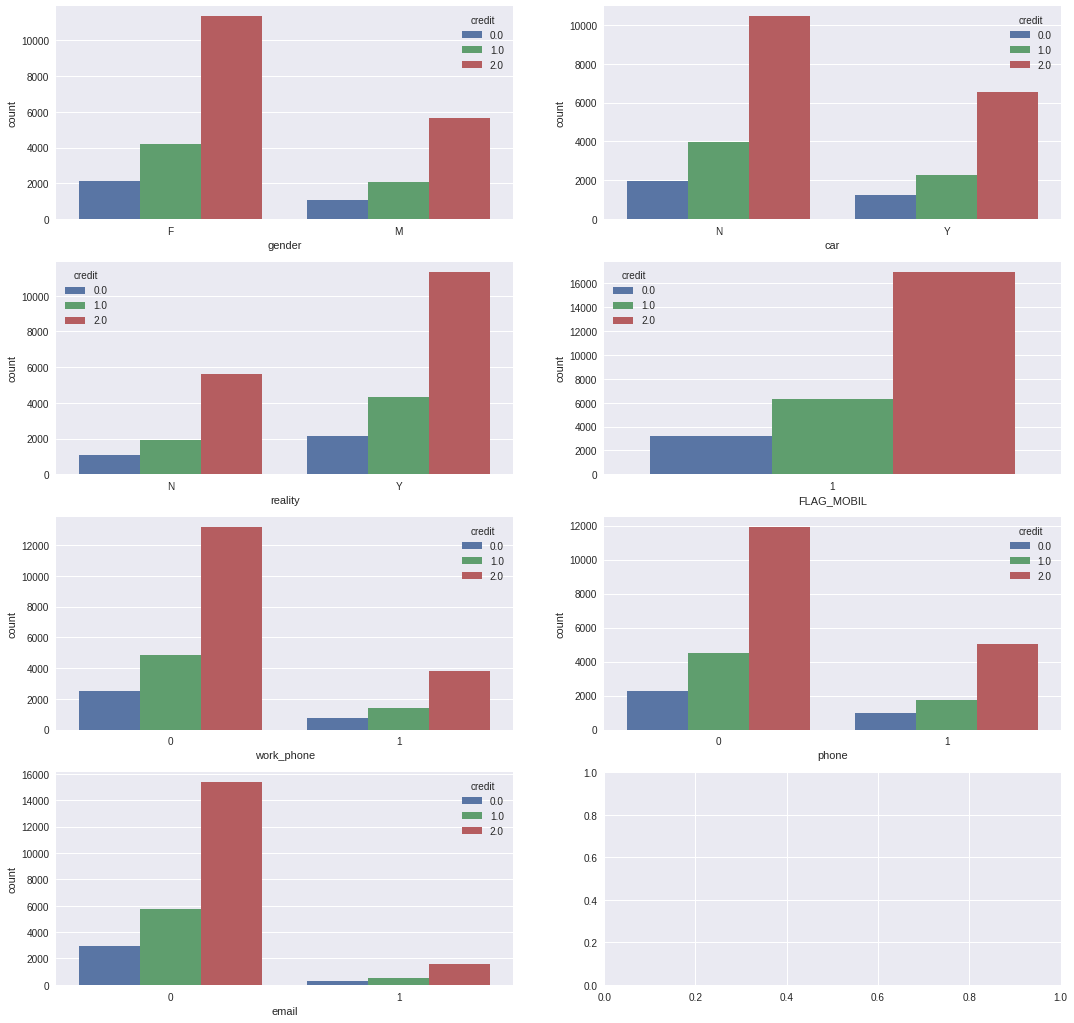

In [ ]:
#countplot
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(18,18))

sns.countplot('gender',hue='credit',data=train,ax=axes[0][0])
sns.countplot('car',hue='credit',data=train,ax=axes[0][1])
sns.countplot('reality',hue='credit',data=train,ax=axes[1][0])
sns.countplot('FLAG_MOBIL',hue='credit',data=train,ax=axes[1][1])
sns.countplot('work_phone',hue='credit',data=train,ax=axes[2][0])
sns.countplot('phone',hue='credit',data=train,ax=axes[2][1])
sns.countplot('email',hue='credit',data=train,ax=axes[3][0])


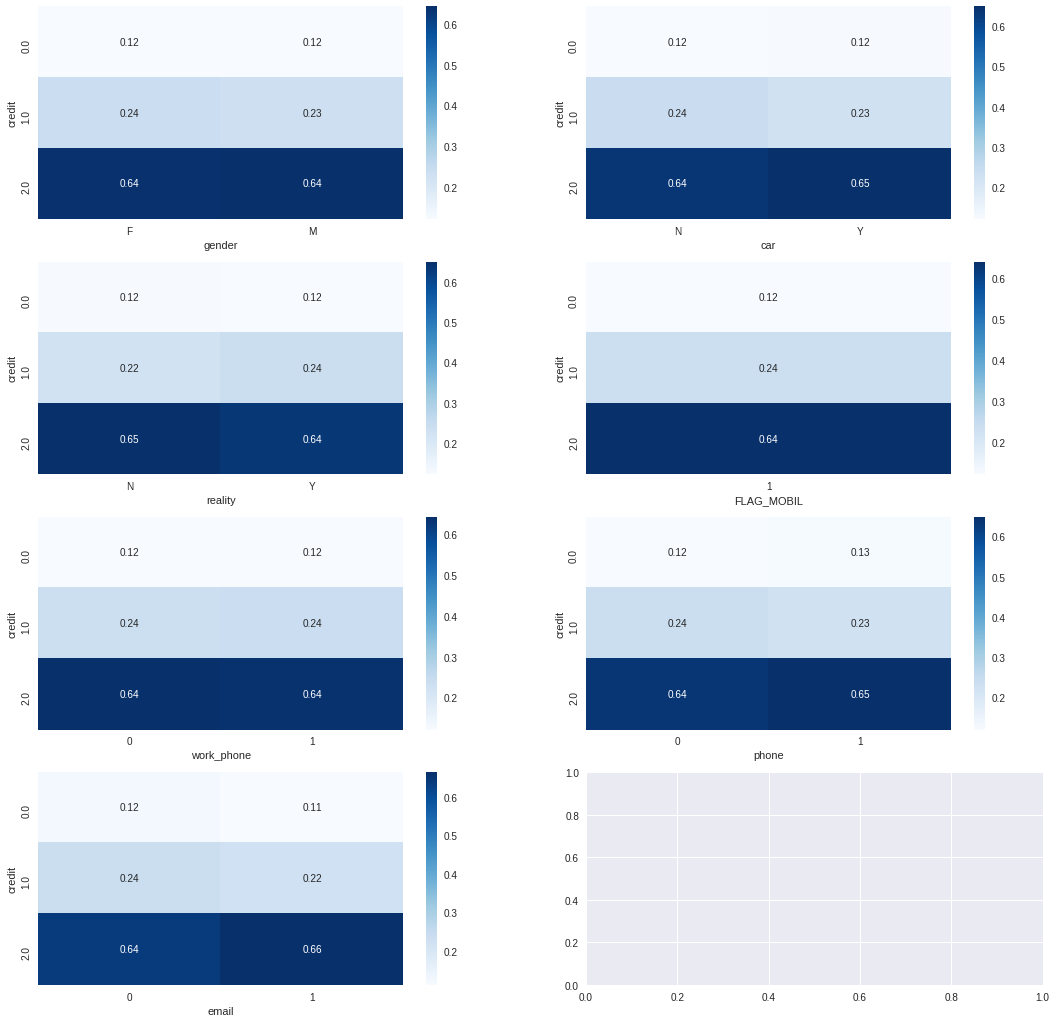

In [ ]:
#비율
bi_list = ['gender', 'car', 'reality', 'FLAG_MOBIL', 'work_phone', 'phone', 'email']
index_list = [[0,0],[0,1],[1,0],[1,1],[2,0],[2,1],[3,0],[3,1]]
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(18,18))
for binary,j in zip(bi_list,index_list):
  df = train.pivot_table(values='index',index='credit',columns=binary,aggfunc='count').apply(lambda x: x/x.sum())
  sns.heatmap(df, annot=True, fmt='.2f', cmap='Blues',ax=axes[j[0]][j[1]])

=>Binary 변수와 credit 상관관계 없어보임

Multi

1. 순서형

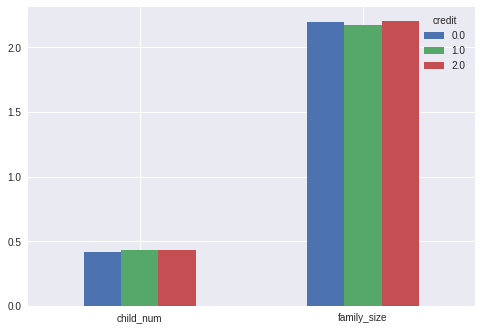

In [ ]:
#child_num, family_size
train[['child_num','family_size','credit']].groupby('credit').mean().T.plot.bar(rot=0)

-child_num

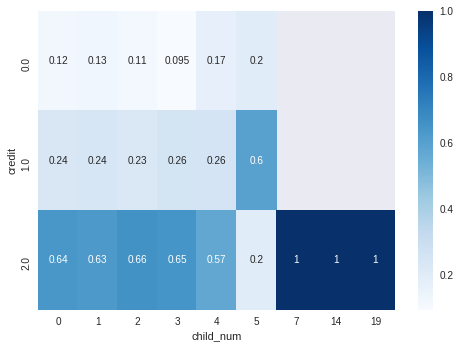

In [ ]:
#child_num
child_df = train.pivot_table(index='credit',columns='child_num',values='index',aggfunc='count').apply(lambda x: x/x.sum())
sns.heatmap(child_df, cmap='Blues', annot=True) 

family_size

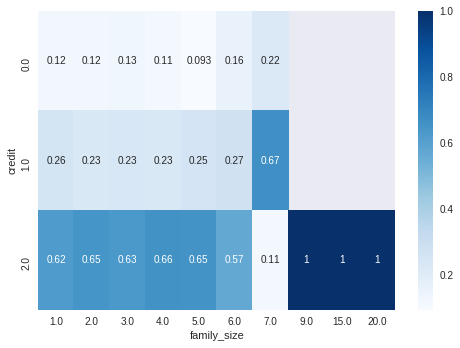

In [ ]:
#family_size
family_df = train.pivot_table(index='credit',columns='family_size',values='index',aggfunc='count').apply(lambda x: x/x.sum())
sns.heatmap(family_df, cmap='Blues', annot=True) 

=> family size와 child_num 도 credit과 상관관계 없어보임

-edu_type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


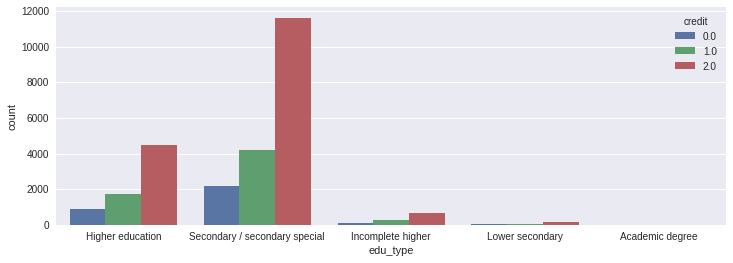

In [ ]:
plt.figure(figsize = (12, 4))
sns.countplot('edu_type',hue='credit',data=train)

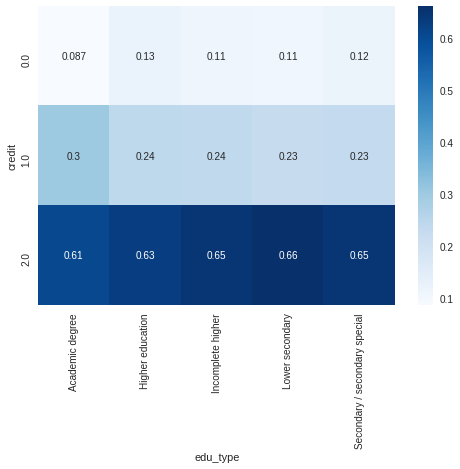

In [ ]:
#edu_type
edu_df = train.pivot_table(index='credit',columns='edu_type',values='index',aggfunc='count').apply(lambda x: x/x.sum())
sns.heatmap(edu_df, cmap='Blues', annot=True) 

-Family_size,  child_num, edu_type 모두 credit과 상관관계 없어보임

2. 명목형

income_type

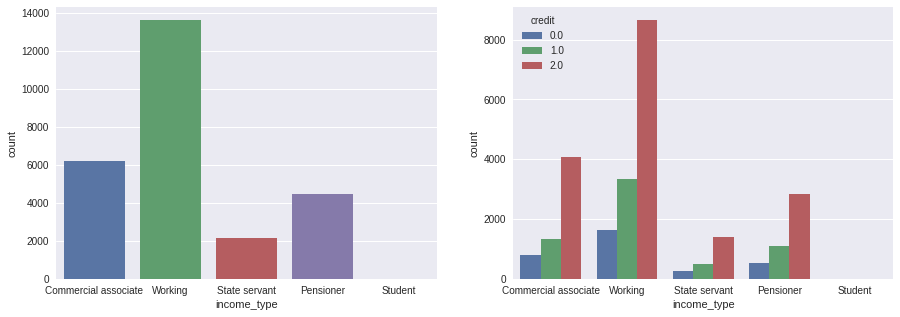

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

sns.countplot(data=train, x='income_type',ax=axes[0])
sns.countplot(data=train, x='income_type',hue='credit',ax=axes[1])

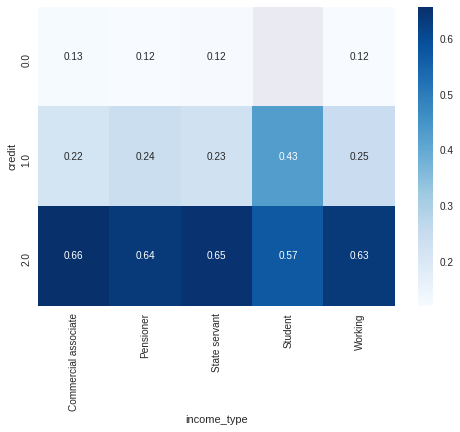

In [ ]:
#edu_type
income_df = train.pivot_table(index='credit',columns='income_type',values='index',aggfunc='count').apply(lambda x: x/x.sum())
sns.heatmap(income_df, cmap='Blues', annot=True) 


student에서 차이를 보이지만 데이터 자체가 작기때문에, 유의미하지 않음

In [ ]:
#occyp_type    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

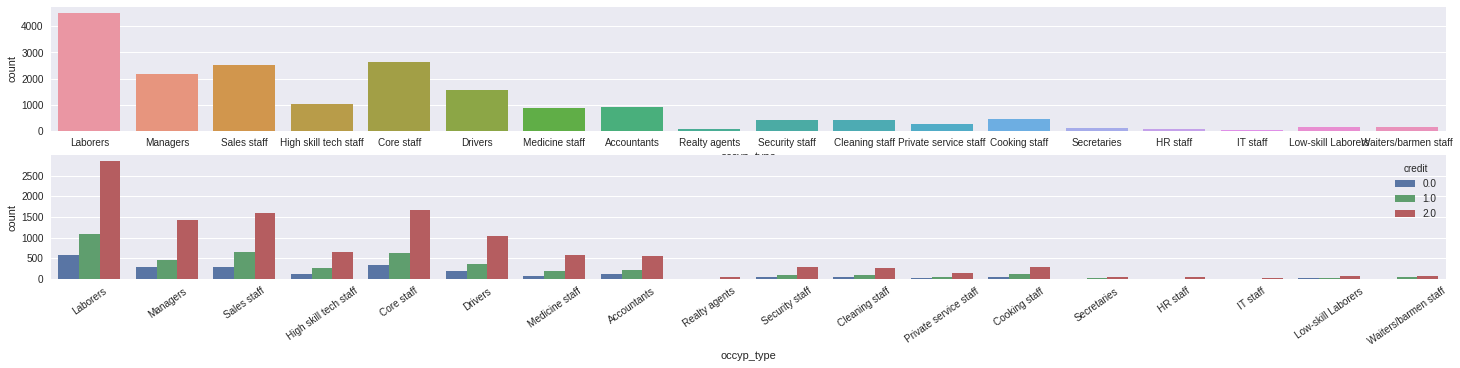

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(25,5))

sns.countplot(data=train, x='occyp_type',ax=axes[0])
plt.xticks(rotation = 35 )

sns.countplot(data=train, x='occyp_type',hue='credit',ax=axes[1])
plt.xticks(rotation =35 )

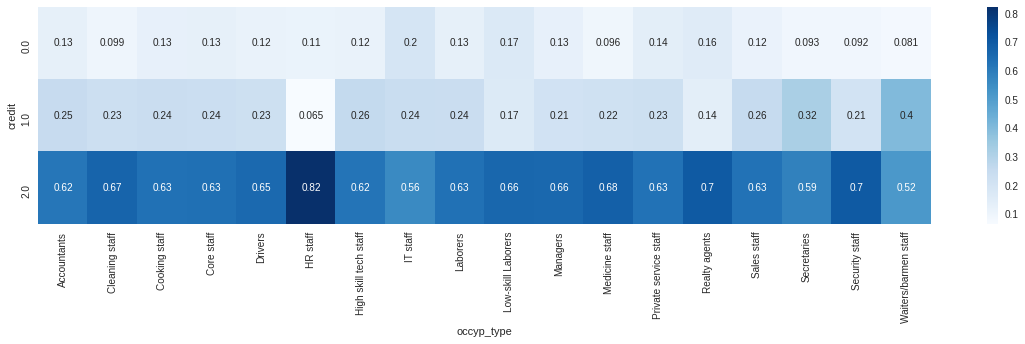

In [ ]:
#occpy_type
occ_df = train.pivot_table(index='credit',columns='occyp_type',values='index',aggfunc='count').apply(lambda x: x/x.sum())
plt.figure(figsize = (20, 4))
sns.heatmap(occ_df, cmap='Blues', annot=True) 

HR staff , Sales staff,Waiters/barmen staff ,IT staff 다른 양상 보임

HR staff -> credit 1의 비율이 매우 낮고, 2의 비율이 높다 -> 하지만 데이터 수가 많지 않음

Sales staff,Waiters/barmen staff-> 다른 직업에 비해 credit 1의 비율이 높고, 2의 비율이 낮음

IT staff -> credit 0 비율이 가장 높고, 2의 비율도 상대적으로 낮은 편 -> 하지만 데이터 수 많지 않음



연속형

-DAYS_BIRTH, DAYS_EMPLOYED, begin_month, incom_total

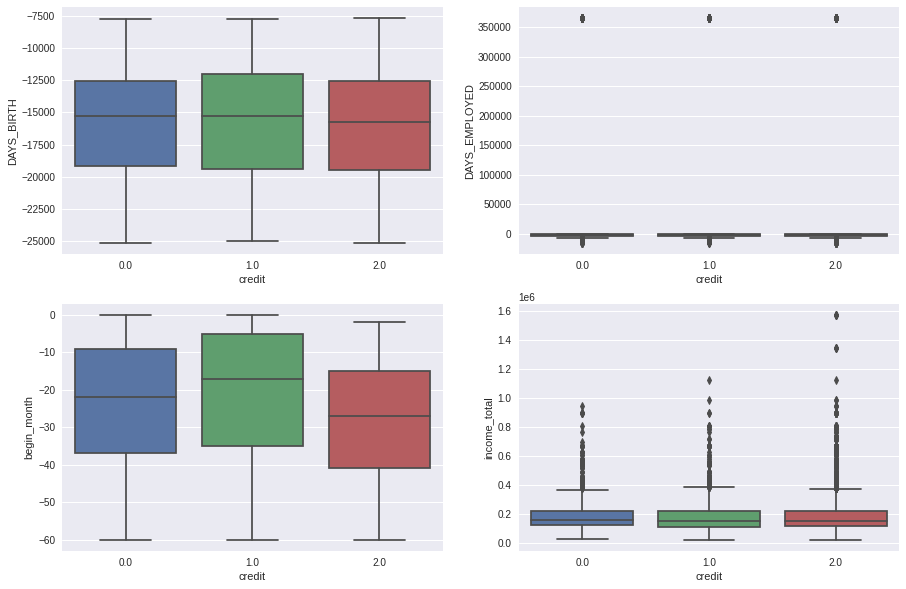

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.boxplot(x='credit',y='DAYS_BIRTH',data=train,ax=axes[0][0])
sns.boxplot(x='credit',y='DAYS_EMPLOYED',data=train,ax=axes[0][1])
sns.boxplot(x='credit',y='begin_month',data=train,ax=axes[1][0])
sns.boxplot(x='credit',y='income_total',data=train,ax=axes[1][1])

-DAYS_EMPLOYED, income_total 은 이상치 제거 후 다시 보기

-begin_month : credit 2에서 낮음 <-> 발급받은지 오래된사람들이 많음 

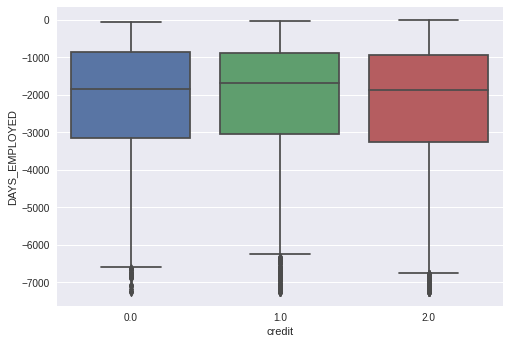

In [ ]:
#DAYS_EMPLOYED

Q1=np.percentile(train['DAYS_EMPLOYED'],25) # 25% 지점이 값(q1)
Q3=np.percentile(train['DAYS_EMPLOYED'],75) # 25% 지점이 값(q1)
IQR=Q3-Q1
outlierStep = IQR*1.5
        
employ_df = train[(train['DAYS_EMPLOYED']>Q1-outlierStep)&(train['DAYS_EMPLOYED']<Q3+outlierStep)]
sns.boxplot(x='credit',y='DAYS_EMPLOYED',data=employ_df)

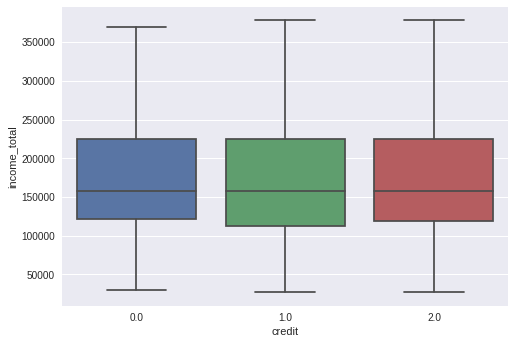

In [ ]:
#income_total

Q1=np.percentile(train['income_total'],25) # 25% 지점이 값(q1)
Q3=np.percentile(train['income_total'],75) # 25% 지점이 값(q1)
IQR=Q3-Q1
outlierStep = IQR*1.5
        
income_df = train[(train['income_total']>Q1-outlierStep)&(train['income_total']<Q3+outlierStep)]
sns.boxplot(x='credit',y='income_total',data=income_df)

DAYS_EMPLOYED, income_total 에서 이상치를 제거해도, 상관관계 보이지 않음

DAYS_BIRTH -> 나이 구하기

In [ ]:
train['age'] = train['DAYS_BIRTH'].apply(lambda x: round(abs(x)/365) )

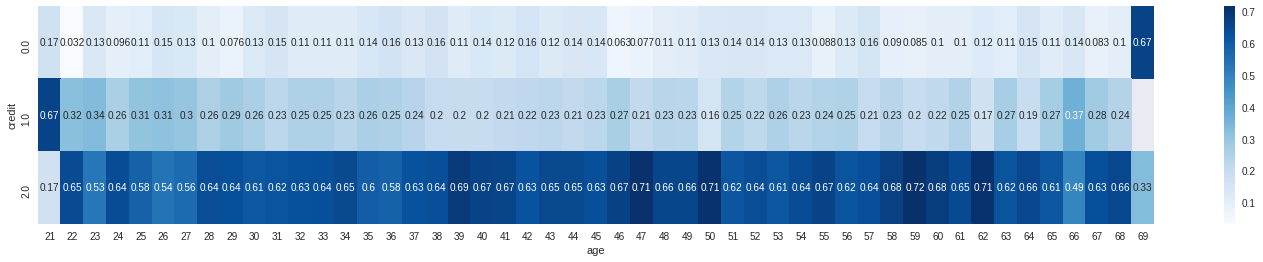

In [ ]:
#age_type
age_df = train.pivot_table(index='credit',columns='age',values='index',aggfunc='count').apply(lambda x: x/x.sum())
plt.figure(figsize = (25, 4))
sns.heatmap(age_df, cmap='Blues', annot=True) 

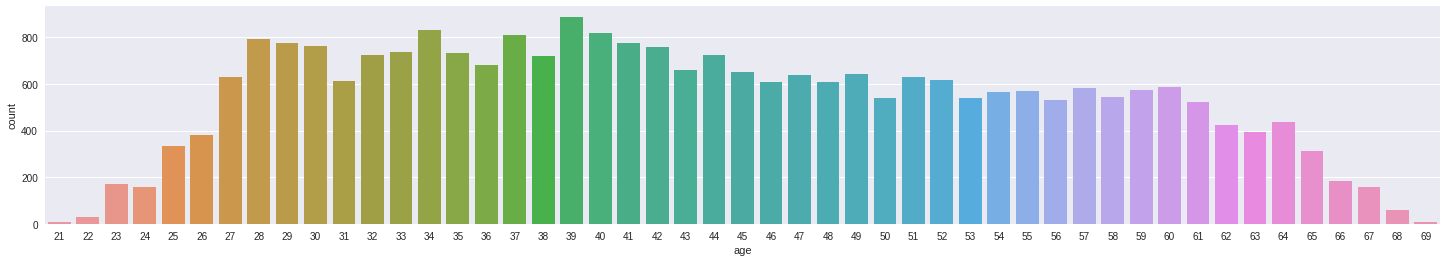

In [ ]:
plt.figure(figsize = (25, 4))
sns.countplot(data=train, x='age')

-21, 69세 credit 분포가 눈에띄지만, 데이터가 매우 적음

-66세 credit 2 많이 낮은 편

10년 단위로 범주화

In [ ]:
 np.arange(2, 7)*10

array([20, 30, 40, 50, 60])

In [ ]:
bins = np.arange(2, 8)*10
labels=['20s','30s','40s','50s','60s']
train['ages'] = pd.cut(train['age'],bins,labels=labels)
train.head()


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age,ages
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,38,30s
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,31,30s
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,52,50s
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,41,40s
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,41,40s


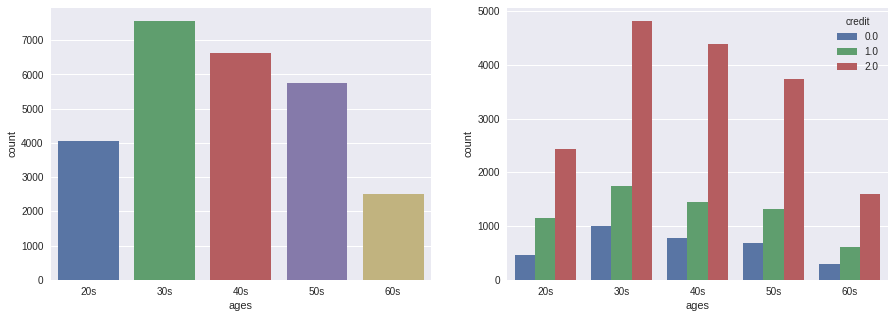

In [ ]:
#연령대 분포
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(data=train, x='ages',ax=axes[0])
sns.countplot(data=train, x='ages',hue='credit',ax=axes[1])

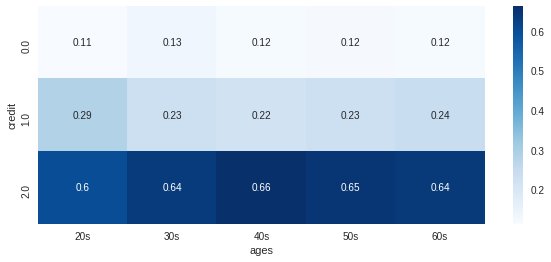

In [ ]:
#age_type
ages_df = train.pivot_table(index='credit',columns='ages',values='index',aggfunc='count').apply(lambda x: x/x.sum())
plt.figure(figsize = (10, 4))
sns.heatmap(ages_df, cmap='Blues', annot=True) 

-20대: credit 1 비율 가장 높고, 2 비율 가장 낮음 

-가장 인원이 많은 30대, credit 0 비율 미세하게 1위: credit 1 비율 가장 높고, 2 비율 가장 낮음 

-가장 인원이 많은 30대, credit 0 비율 미세하게 1위